In [1]:
import numpy as np
from ncon import *
import time as t
import scipy.special
import matplotlib.pyplot as plt

In [15]:
def haar_random_isometry(p, chi):
    temp = np.random.rand(p * chi, p * chi) + 1j * np.random.rand(p * chi, p * chi)
    temp = temp + np.conjugate(np.transpose(temp))
    return np.linalg.eigh(temp)[1][:, :chi] 

def create_tensors(n, p, chi):
    tensor_list = []
    temp = np.reshape(haar_random_isometry(p, chi), [chi, p, chi])
    for i in range(n):
        tensor_list.append(temp)
    return np.array(tensor_list)

def create_transfer_matrix(tensor_list_A, tensor_list_B, i, chi):
    return np.reshape(ncon([tensor_list_A[i], np.conjugate(tensor_list_B[i])], [[-1, 1, -3], [-2, 1, -4]]), [chi ** 2, chi ** 2])

def overlap(tensor_list_A, tensor_list_B, chi):
    transfer_matrix = create_transfer_matrix(tensor_list_A, tensor_list_B, 0, chi)
    normalization = transfer_matrix
    for i in range(1, len(tensor_list_A)):
        normalization = create_transfer_matrix(tensor_list_A, tensor_list_B, i, chi) @ normalization
    return np.trace(normalization)

Check

In [16]:
# tensor_list = create_tensors(n, p, chi)
# print(overlap(tensor_list, tensor_list, chi))

# tensor_list = tensor_list / np.sqrt(overlap(tensor_list, tensor_list, chi) ** (1/n))
# print(np.abs(1 - overlap(tensor_list, tensor_list, chi)))

# if np.abs(1 - overlap(tensor_list, tensor_list, chi)) > 1.e-14:
    
#     raise ValueError("State not normalized!")

In [17]:
p = 2
k_copies = 3
n = 4
samples = 1000
chi_list = np.arange(5, 10)
list_purity_vs_chi = []

for chi in chi_list:
    average_purity = 0
    start_time = t.time()
    for sample in range(samples):
        tensor_list_A = create_tensors(n, p, chi)
        tensor_list_A[0] = tensor_list_A[0] / np.sqrt(np.abs(overlap(tensor_list_A, tensor_list_A, chi)))
        tensor_list_B = create_tensors(n, p, chi)
        tensor_list_B[0] = tensor_list_B[0] / np.sqrt(np.abs(overlap(tensor_list_B, tensor_list_B, chi)))
        
        if np.abs(1 - overlap(tensor_list_A, tensor_list_A, chi)) > 1.e-14:
            print(np.abs(1 - overlap(tensor_list_A, tensor_list_A, chi)))
            raise ValueError("State not normalized!")
        
        if np.abs(1 - overlap(tensor_list_B, tensor_list_B, chi)) > 1.e-14:
            print(np.abs(1 - overlap(tensor_list_B, tensor_list_B, chi)))
            raise ValueError("State not normalized!")

        temp = np.abs(overlap(tensor_list_A, tensor_list_B, chi)) ** ( 2 * k_copies )
        average_purity += temp
    
    average_purity /= (samples ** 2)
    list_purity_vs_chi.append(average_purity)
    print(str(chi) + ":\t elapsed time: %2.2f" % (t.time() - start_time))

list_purity_vs_chi = np.array(list_purity_vs_chi)
print(list_purity_vs_chi)
# print("average purity:", average_purity)

5:	 elapsed time: 10.49
6:	 elapsed time: 14.89
7:	 elapsed time: 15.43
8:	 elapsed time: 15.55
9:	 elapsed time: 18.15
[1.95318497e-05 2.00614299e-05 1.98561884e-05 1.88885360e-05
 1.74898809e-05]


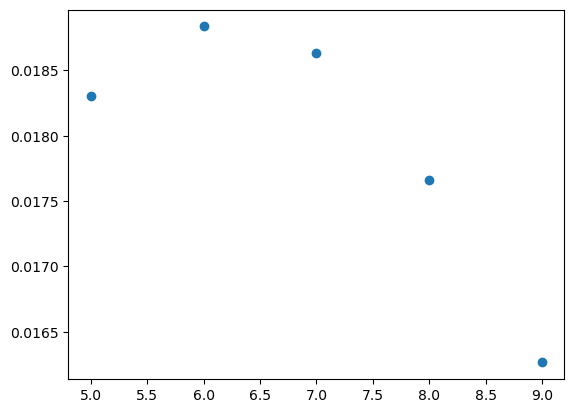

In [20]:
fig, ax = plt.subplots()
# ax.scatter(chi_list, list_purity_vs_chi * samples)
ax.scatter(chi_list, (np.abs(list_purity_vs_chi * samples - (1. / scipy.special.binom(p ** n + k_copies - 1, k_copies)))))
# ax.plot(chi_list, (1. / scipy.special.binom(p ** n + k_copies - 1, k_copies)) * np.ones_like(chi_list))
# ax.plot(chi_list, (1. / (p ** (n * k_copies))) * np.ones_like(chi_list))
# ax.plot(chi_list, 1./ chi_list)
# ax.set_yscale("log")